In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
df = pd.read_csv('S02-hw-dataset.csv')
df.head() #первые пять строк датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [175]:
df.info()  #доп информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [176]:
df.describe() #статистика

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [177]:
df.isna().mean()  #доля пропусков

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [178]:
df['age'].dropna() #удаление пропусков

0      25.0
1      24.0
2      52.0
3      31.0
5     120.0
6      46.0
7      28.0
8      39.0
9      24.0
10     24.0
11     20.0
13     36.0
14     57.0
15     22.0
16     32.0
17     24.0
18     47.0
19     31.0
20      5.0
21     33.0
22     42.0
23     32.0
24     21.0
25     35.0
26     54.0
27     43.0
28     47.0
29     52.0
30     55.0
31     26.0
32     23.0
33     28.0
34     45.0
35     51.0
36     18.0
37     35.0
38     39.0
39     34.0
40     24.0
Name: age, dtype: float64

In [179]:
df[df.duplicated()] #строки-дубликаты

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [180]:
df.drop_duplicates() #удаление повторов

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [181]:
print(f"Отрицательный возраст: {len(df[df['age']<0])} \n{df[df['age']<0]}") #проверка на подозрительные случаи
print(f"Отрицательное количество: {len(df[df['purchases']<0])} \n{df[df['purchases']<0]}")
print(f"Отрицательный доход: {len(df[df['revenue']<0])} \n{df[df['revenue']<0]}")
print(f"Неправдоподобный возраст: {len(df[df['age']>100])} \n{df[df['age']>100]}")
print(f"Нулевой доход при ненулевых количествах: {len(df[(df['revenue']==0) & (df['purchases']>0)])} \n{df[(df['revenue']==0) & (df['purchases']>0)]}")

Отрицательный возраст: 0 
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
Отрицательное количество: 1 
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Отрицательный доход: 0 
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
Неправдоподобный возраст: 1 
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Нулевой доход при ненулевых количествах: 1 
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


**Проверка показала 3 аномалии**: есть один случай отрицательного количества покупок, один случай неправдоподобного возраста (120 лет) и один случай нулевого дохода при совершенных покупках

In [182]:
df['country'].value_counts() #частота обнаружения разных стран

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [183]:
gr = df.groupby('country')

print(gr['purchases'].agg(['sum', 'mean']))  #суммарное количество и среднее
print(gr['revenue'].agg(['sum', 'mean']))  #суммарная стоимость и средняя
print(gr['age'].mean()) #средний возраст

         sum      mean
country               
CN         9  4.500000
DE        39  6.500000
FR        51  4.250000
RU        62  4.769231
US        37  4.625000
           sum         mean
country                    
CN        2108  1054.000000
DE        8673  1445.500000
FR        8111   675.916667
RU       10271   790.076923
US        4459   557.375000
country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64


In [184]:
cut = pd.cut(df['age'], labels=['подростки', 'взрослые', 'пожилые'], bins=[0, 20, 60, 120])
data = df.copy()
data['age']=cut
gr_age = data.groupby('age', observed=False)
gr_age.size()

age
подростки     3
взрослые     35
пожилые       1
dtype: int64

In [185]:
gr_age['revenue'].mean()  #средняя стоимость по возрасту

age
подростки    1414.666667
взрослые      761.914286
пожилые       785.000000
Name: revenue, dtype: float64

Среди покупателей преобладают россияне и французы. Самая часто встречаемая возрастная категория - взрослые (20-60 лет). Средняя стоимость покупки больше всех у клиентов из Германии, как и среднее количество покупок. Средний возраст покупателей самый молодой в Китае, а пожилой - во Франции. Самые большие покупки совершают молодые люди.

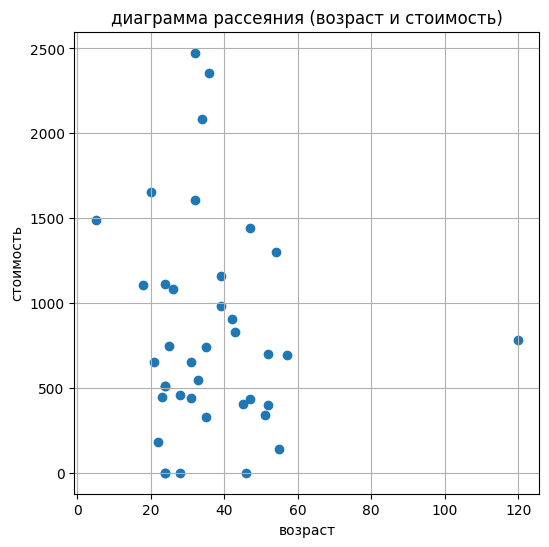

In [173]:
plt.figure(figsize=(6, 6))

plt.scatter(df['age'], df['revenue']) 
plt.title('диаграмма рассеяния (возраст и стоимость)')
plt.xlabel('возраст') 
plt.ylabel('стоимость')
plt.grid()
plt.savefig('figures/scatterplot.png')
plt.show()

По графику видно, что основная доля покупателей в возрасте 20-40 лет, также как и то, что именно они делают самые большие покупки

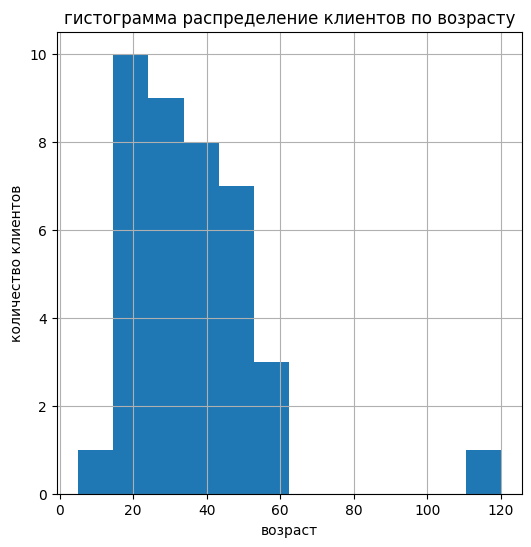

In [186]:
plt.figure(figsize=(6, 6))
plt.grid()
plt.hist(df['age'], bins=12)
plt.title('гистограмма распределение клиентов по возрасту')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.savefig('figures/his.png')
plt.show()

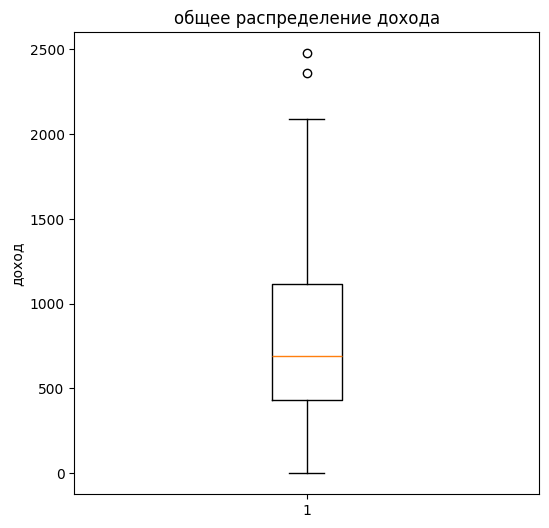

In [187]:
plt.figure(figsize=(6, 6))

plt.boxplot(df['revenue'])

plt.ylabel('доход')
plt.title('общее распределение дохода')
plt.savefig('figures/boxplot.png')
plt.show()